### Pipeline: Clean Continuous features

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
titanic = pd.read_csv('D:/Programming/Dataset/titanic.csv')
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Fill Missing Value

In [3]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# titanic['Age'].fillna(titanic['Age'].mean(), inplace = True)
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Figure size 432x288 with 0 Axes>

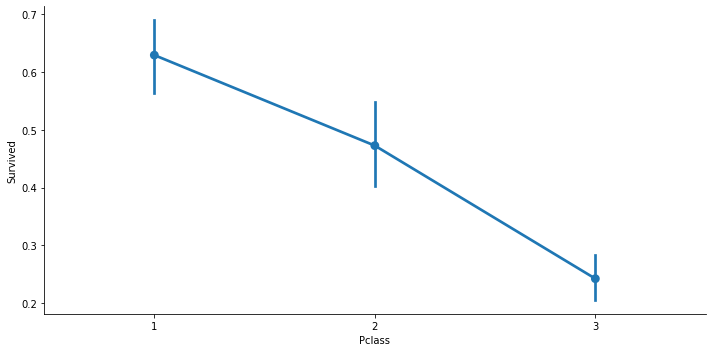

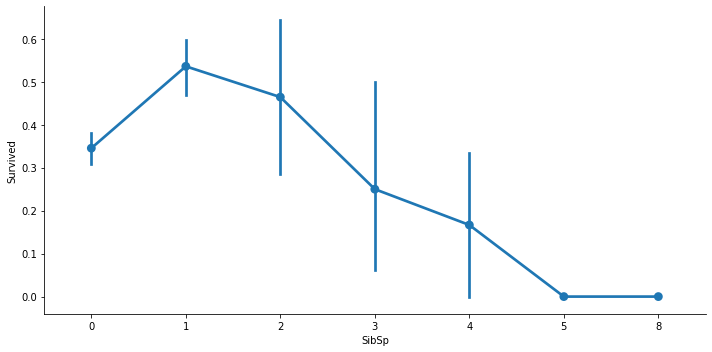

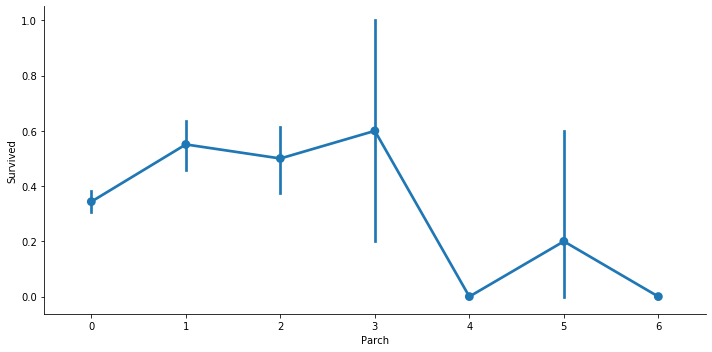

In [8]:
for i, col in enumerate(['Pclass', 'SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col , y='Survived' , data=titanic , kind='point' , aspect=2,)

In [9]:
titanic['Family_cnt'] = titanic['Pclass'] + titanic['SibSp']

In [10]:
titanic.drop(['PassengerId','Pclass', 'SibSp'], axis = 1, inplace=True)

### Clean Categorical Feature

In [11]:
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)

In [12]:
gender_num = {'male': 0, 'female':1}
titanic['Sex']= titanic['Sex'].map(gender_num)
titanic.head(5)

,Survived,Name,Sex,Age,Parch,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin_ind
0,0,"Braund, Mr. Owen Harris",0,22.0,0,A/5 21171,7.2500,NaN,S,4,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,0,PC 17599,71.2833,C85,C,2,1
2,1,"Heikkinen, Miss. Laina",1,26.0,0,STON/O2. 3101282,7.9250,NaN,S,3,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,0,113803,53.1000,C123,S,2,1
4,0,"Allen, Mr. William Henry",0,35.0,0,373450,8.0500,NaN,S,3,0


In [13]:
titanic.drop(['Cabin', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
titanic.head(5)

,Survived,Sex,Age,Parch,Fare,Family_cnt,Cabin_ind
0,0,0,22.0,0,7.2500,4,0
1,1,1,38.0,0,71.2833,2,1
2,1,1,26.0,0,7.9250,3,0
3,1,1,35.0,0,53.1000,2,1
4,0,0,35.0,0,8.0500,3,0


### Splitting the data into train, validation and test set

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
features = titanic.drop('Survived', axis = 1)
labels = titanic['Survived']

In [16]:
x_train, x_test,y_train, y_test = train_test_split(features, labels, test_size = 0.6, random_state = 46)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5, random_state = 46)

In [17]:
print(len(features), len(x_train), len(x_val), len(x_test))

891 356 267 268


In [18]:
print(len(labels), len(y_train), len(y_val), len(y_test))

891 356 267 268


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [20]:
rf = RandomForestClassifier()

score = cross_val_score(rf, x_train, y_train, cv=5)

In [21]:
score

array([0.77777778, 0.73611111, 0.78873239, 0.78873239, 0.8       ])

### Tune Hyperparameter

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [24]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 10, 100],
    'max_depth': [2, 10, 20, None]
}

cv = GridSearchCV(rf, parameters, cv = 5)
cv.fit(x_train, y_train)

print_results(cv)

C:\Users\Satish\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


BEST PARAMS: {'max_depth': 10, 'n_estimators': 100}

0.742 (+/-0.089) for {'max_depth': 2, 'n_estimators': 5}
0.753 (+/-0.035) for {'max_depth': 2, 'n_estimators': 10}
0.744 (+/-0.067) for {'max_depth': 2, 'n_estimators': 100}
0.781 (+/-0.044) for {'max_depth': 10, 'n_estimators': 5}
0.775 (+/-0.07) for {'max_depth': 10, 'n_estimators': 10}
0.789 (+/-0.043) for {'max_depth': 10, 'n_estimators': 100}
0.767 (+/-0.083) for {'max_depth': 20, 'n_estimators': 5}
0.775 (+/-0.044) for {'max_depth': 20, 'n_estimators': 10}
0.778 (+/-0.057) for {'max_depth': 20, 'n_estimators': 100}
0.744 (+/-0.078) for {'max_depth': None, 'n_estimators': 5}
0.764 (+/-0.055) for {'max_depth': None, 'n_estimators': 10}
0.767 (+/-0.059) for {'max_depth': None, 'n_estimators': 100}


### Evaluate result on validation set

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [26]:
rf1 = RandomForestClassifier(n_estimators= 100, max_depth = 10)
rf1.fit(x_train, y_train)

rf2 = RandomForestClassifier(n_estimators= 5, max_depth = 10)
rf2.fit(x_train, y_train)

rf3 = RandomForestClassifier(n_estimators= 100, max_depth = 20)
rf3.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
for mdl in [rf1, rf2, rf3]:
    y_pred = mdl.predict(x_val)
    accuracy = round(accuracy_score(y_val,y_pred), 3)
    precision = round(precision_score(y_val,y_pred), 3)
    recall = round(recall_score(y_val,y_pred), 3)
    print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(mdl.max_depth,
                                                                         mdl.n_estimators,
                                                                         accuracy,
                                                                         precision,
                                                                         recall))

MAX DEPTH: 10 / # OF EST: 100 -- A: 0.801 / P: 0.766 / R: 0.699
MAX DEPTH: 10 / # OF EST: 5 -- A: 0.76 / P: 0.71 / R: 0.641
MAX DEPTH: 20 / # OF EST: 100 -- A: 0.828 / P: 0.806 / R: 0.728


### Evaluate the best model on test set

In [29]:
    y_pred = rf3.predict(x_test)
    accuracy = round(accuracy_score(y_test,y_pred), 3)
    precision = round(precision_score(y_test,y_pred), 3)
    recall = round(recall_score(y_test,y_pred), 3)
    print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(mdl.max_depth,
                                                                         mdl.n_estimators,
                                                                         accuracy,
                                                                         precision,
                                                                         recall))

MAX DEPTH: 20 / # OF EST: 100 -- A: 0.75 / P: 0.667 / R: 0.66
